## 1. Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from string import ascii_lowercase
from itertools import combinations

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import  GradientBoostingClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from IPython.display import Image

## 2. Data

In [2]:
train = pd.read_csv('C:/Users\queenSSH/Desktop/학교/CUAI/235647_심리 성향 예측 AI 경진대회_data/open data/train.csv')
test = pd.read_csv('C:/Users\queenSSH/Desktop/학교/CUAI/235647_심리 성향 예측 AI 경진대회_data/open data/test_x.csv')

## 3. EDA

In [3]:
train.head()

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,...,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,...,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,...,1,1,0,1,1,1,1,0,1,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,...,0,0,0,0,1,0,1,0,1,1
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,...,1,1,1,1,1,0,1,1,1,1


In [4]:
test.head()

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,736,2.0,2941,3.0,4621,1.0,4857,2.0,...,0,1,0,0,1,0,1,0,1,1
1,1,3.0,514,2.0,1952,3.0,1552,3.0,821,4.0,...,0,0,0,0,0,0,0,0,0,0
2,2,3.0,500,2.0,2507,4.0,480,2.0,614,2.0,...,0,1,0,1,1,0,1,0,1,1
3,3,1.0,669,1.0,1050,5.0,1435,2.0,2252,5.0,...,1,1,1,1,1,1,1,1,1,1
4,4,2.0,499,1.0,1243,5.0,845,2.0,1666,2.0,...,1,1,0,1,1,0,1,1,1,1


In [5]:
print(train.columns.tolist())

['index', 'QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA', 'QeE', 'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA', 'QjE', 'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA', 'QoE', 'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA', 'QtE', 'age_group', 'education', 'engnat', 'familysize', 'gender', 'hand', 'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04', 'tp05', 'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'voted', 'wf_01', 'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06', 'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13']


Columns

'QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA', 'QeE', 'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA', 'QjE', 'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA', 'QoE', 'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA', 'QtE',

'age_group', 'education', 'engnat', 'familysize', 'gender', 'hand', 'married', 'race', 'religion',

'tp01', 'tp02', 'tp03', 'tp04', 'tp05', 'tp06', 'tp07', 'tp08', 'tp09', 'tp10',

'wf_01', 'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06', 'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13'

urban', 'voted'

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11383 entries, 0 to 11382
Data columns (total 77 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       11383 non-null  int64  
 1   QaA         11383 non-null  float64
 2   QaE         11383 non-null  int64  
 3   QbA         11383 non-null  float64
 4   QbE         11383 non-null  int64  
 5   QcA         11383 non-null  float64
 6   QcE         11383 non-null  int64  
 7   QdA         11383 non-null  float64
 8   QdE         11383 non-null  int64  
 9   QeA         11383 non-null  float64
 10  QeE         11383 non-null  int64  
 11  QfA         11383 non-null  float64
 12  QfE         11383 non-null  int64  
 13  QgA         11383 non-null  float64
 14  QgE         11383 non-null  int64  
 15  QhA         11383 non-null  float64
 16  QhE         11383 non-null  int64  
 17  QiA         11383 non-null  float64
 18  QiE         11383 non-null  int64  
 19  QjA         11383 non-nul

In [7]:
train.isnull().sum()

index    0
QaA      0
QaE      0
QbA      0
QbE      0
        ..
wr_09    0
wr_10    0
wr_11    0
wr_12    0
wr_13    0
Length: 78, dtype: int64

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11383 entries, 0 to 11382
Data columns (total 77 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       11383 non-null  int64  
 1   QaA         11383 non-null  float64
 2   QaE         11383 non-null  int64  
 3   QbA         11383 non-null  float64
 4   QbE         11383 non-null  int64  
 5   QcA         11383 non-null  float64
 6   QcE         11383 non-null  int64  
 7   QdA         11383 non-null  float64
 8   QdE         11383 non-null  int64  
 9   QeA         11383 non-null  float64
 10  QeE         11383 non-null  int64  
 11  QfA         11383 non-null  float64
 12  QfE         11383 non-null  int64  
 13  QgA         11383 non-null  float64
 14  QgE         11383 non-null  int64  
 15  QhA         11383 non-null  float64
 16  QhE         11383 non-null  int64  
 17  QiA         11383 non-null  float64
 18  QiE         11383 non-null  int64  
 19  QjA         11383 non-nul

### 데이터 설명

#### 1. Q_A / Q_E (a~t) 비식별화를 위해 일부 질문은 Secret 처리
Qa : Secret
Qb : The biggest difference between most criminals and other people is that the criminals are stupid enough to get caught.
Qc : Anyone who completely trusts anyone else is asking for trouble.
.
.
.

1=Disagree, 2=Slightly disagree, 3=Neutral, 4=Slightly agree, 5=Agree.


#### 2. Q_E(a~t) : 질문을 답할 때까지의 시간

#### 3. education : 교육 수준
1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree, 0=무응답

#### 4. engnat : 모국어가 영어
1=Yes, 2=No, 0=무응답

#### 5. hand : 필기하는 손
1=Right, 2=Left, 3=Both, 0=무응답

#### 6. tp__(01~07) : items were rated "I see myself as:" _____ such that
tp01 : Extraverted, enthusiastic.
tp02 : Critical, quarrelsome.
tp03 : Dependable, self-disciplined.
tp04 : Anxious, easily upset.
tp05 : Open to new experiences, complex.
tp06 : Reserved, quiet.
tp07 : Sympathetic, warm.
tp08 : Disorganized, careless.
tp09 : Calm, emotionally stable.
tp10 : Conventional, uncreative.

#### 7. urban : 유년기의 거주 구역
1=Rural (country side), 2=Suburban, 3=Urban (town, city), 0=무응답

#### 8. wr_(01~13) : 실존하는 해당 단어의 정의을 앎
1=Yes, 0=No

#### 9. wf_(01~03) : 허구인 단어의 정의를 앎
1=Yes, 0=No


In [9]:
eda_train = train.copy()

In [10]:
Answers = ['QaA', 'QbA', 'QcA', 'QdA', 'QeA',
             'QfA', 'QgA', 'QhA', 'QiA', 'QjA', 
             'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 
             'QpA', 'QqA', 'QrA', 'QsA', 'QtA']

In [12]:
eda_train.head()

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,...,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,...,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,...,1,1,0,1,1,1,1,0,1,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,...,0,0,0,0,1,0,1,0,1,1
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,...,1,1,1,1,1,0,1,1,1,1


In [13]:
ascii_lowercase

'abcdefghijklmnopqrstuvwxyz'

delay column = QaA ~ QtA column

delay column 들의 분포를 고르게 해주기 위해 10승 루트를 해준다 (log보다 나은 결과)

In [14]:
questions = [i for i in list(ascii_lowercase)[:20]]
eda_train['delay'] = eda_train[[('Q'+i+'E') for i in questions]].sum(axis=1)

C:\Users\queenSSH\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\queenSSH\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delay', ylabel='Density'>

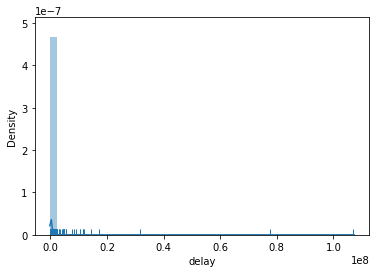

In [15]:
sns.distplot(eda_train['delay'], rug = True)

C:\Users\queenSSH\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\queenSSH\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delay', ylabel='Density'>

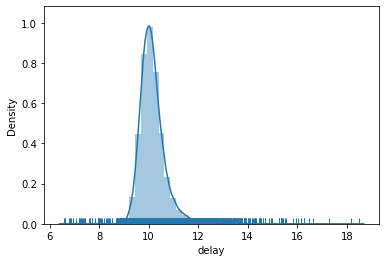

In [16]:
eda_train['delay'] = np.log(eda_train['delay'])
sns.distplot(eda_train['delay'], rug = True)

C:\Users\queenSSH\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\queenSSH\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delay', ylabel='Density'>

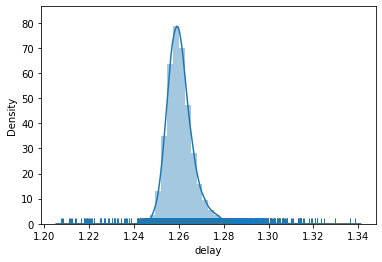

In [17]:
eda_train['delay'] = eda_train['delay'] **(1/10)
sns.distplot(eda_train['delay'], rug = True)

### other features

In [18]:
eda_train['voted']

0        2
1        2
2        1
3        1
4        1
        ..
45527    2
45528    2
45529    1
45530    1
45531    1
Name: voted, Length: 45532, dtype: int64

In [19]:
voted = eda_train[eda_train['voted']==1]
unvoted = eda_train[eda_train['voted']==2]

나이대 별로 투표의 유무 확인

10대 투표율이 굉장히 낮음

<AxesSubplot:xlabel='age_group', ylabel='count'>

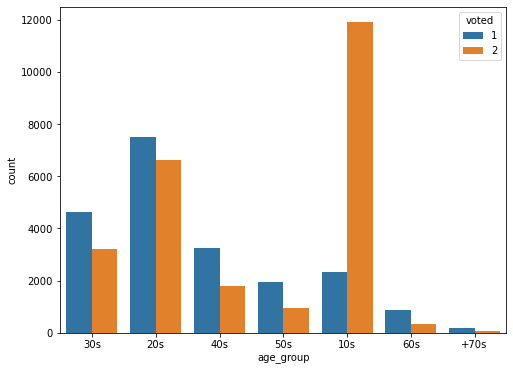

In [20]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'age_group', hue = eda_train['voted'])

결혼의 유무로 투표 유무 확인

1=Never married, 2=Currently married, 3=Previously married, 0=Other

결혼안할수록 투표율 높음

<AxesSubplot:xlabel='married', ylabel='count'>

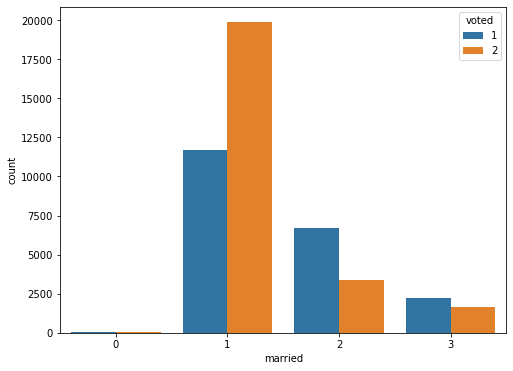

In [21]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'married', hue = eda_train['voted'])

성별의 유무로 투표 유무 확인

<AxesSubplot:xlabel='gender', ylabel='count'>

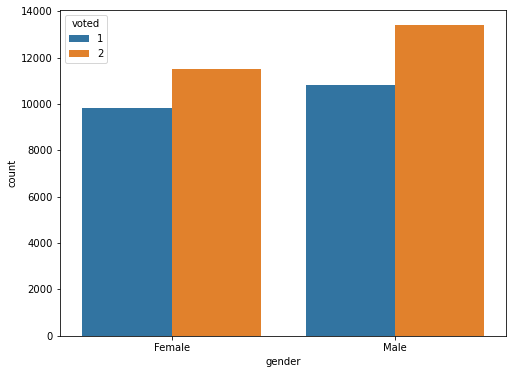

In [22]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'gender', hue = eda_train['voted'])

인종별 투표 유무 확인

백인 투표율 높음

<AxesSubplot:xlabel='race', ylabel='count'>

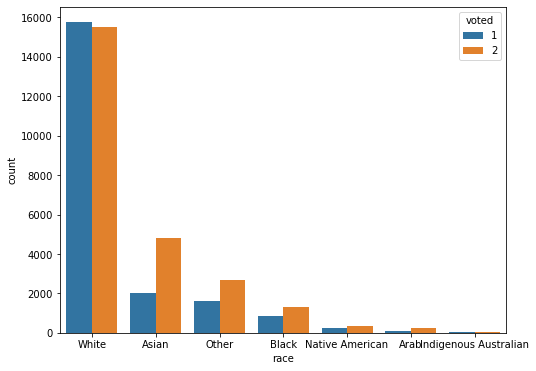

In [23]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'race', hue = eda_train['voted'])

종교별 투표 유무 확인

<AxesSubplot:xlabel='religion', ylabel='count'>

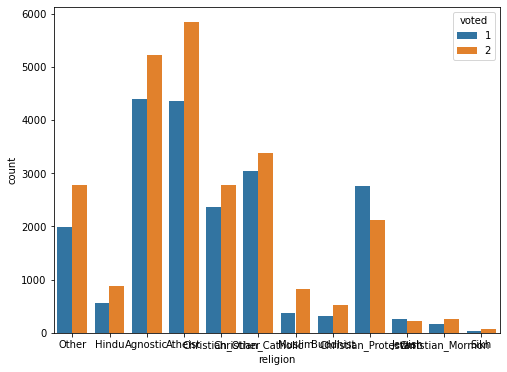

In [24]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'religion', hue = eda_train['voted'])

In [25]:
eda_train['race']

0        White
1        Asian
2        White
3        Asian
4        White
         ...  
45527    White
45528    White
45529    White
45530    White
45531    White
Name: race, Length: 45532, dtype: object

urban 별 투표 유무

1=Rural (country side), 2=Suburban, 3=Urban (town, city), 0=무응답

<AxesSubplot:xlabel='urban', ylabel='count'>

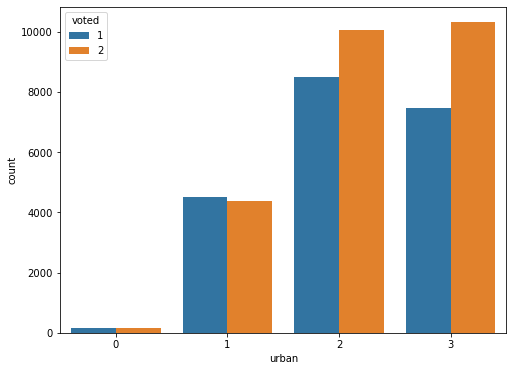

In [26]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'urban', hue = eda_train['voted'])

모국어가 영어 (1 : yes 2: no 0: 무응답) 별 투표 유무

<AxesSubplot:xlabel='engnat', ylabel='count'>

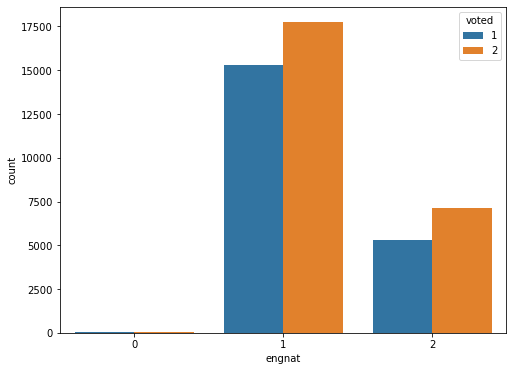

In [27]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'engnat', hue = eda_train['voted'])

## 4. Feature Engineering

In [29]:
x_train = train.copy()
x_train.drop('voted', axis=1, inplace = True)
y_train = train['voted']

In [30]:
dataset = [x_train, test]

In [31]:
dataset

[       index  QaA   QaE  QbA   QbE  QcA   QcE  QdA   QdE  QeA  ...  wr_04  \
 0          0  3.0   363  4.0  1370  5.0   997  1.0  1024  2.0  ...      0   
 1          1  5.0   647  5.0  1313  3.0  3387  5.0  2969  1.0  ...      1   
 2          2  4.0  1623  1.0  1480  1.0  1021  4.0  3374  5.0  ...      1   
 3          3  3.0   504  3.0  2311  4.0   992  3.0  3245  1.0  ...      0   
 4          4  1.0   927  1.0   707  5.0   556  2.0  1062  1.0  ...      1   
 ...      ...  ...   ...  ...   ...  ...   ...  ...   ...  ...  ...    ...   
 45527  45527  2.0  1050  5.0   619  4.0   328  1.0   285  1.0  ...      1   
 45528  45528  2.0   581  3.0  1353  4.0  1164  1.0   798  3.0  ...      1   
 45529  45529  4.0   593  1.0   857  1.0  1047  4.0  1515  5.0  ...      1   
 45530  45530  1.0   747  3.0  1331  4.0   892  2.0  1281  1.0  ...      1   
 45531  45531  3.0   496  5.0  1827  5.0   754  3.0  1117  1.0  ...      1   
 
        wr_05  wr_06  wr_07  wr_08  wr_09  wr_10  wr_11  wr_12

마키아밸리 테스트 FE

In [32]:
questions = [i for i in list(ascii_lowercase)[:20]]

#QaA ~QtA: answers
answers = [('Q'+i+'A') for i in questions]

Tactic/ Morality/ View에 따라 feature 항목을 나눈것

In [33]:
for data in dataset:
  data['T'] = data['QcA'] - data['QfA'] + data['QoA'] - data['QrA'] + data['QsA']
  data['V'] = data['QbA'] - data['QeA'] + data['QhA'] + data['QjA'] + data['QmA'] - data['QqA']
  data['M'] = - data['QkA']

In [34]:
data['QeA']

0        2.0
1        4.0
2        2.0
3        5.0
4        2.0
        ... 
11378    2.0
11379    2.0
11380    1.0
11381    2.0
11382    1.0
Name: QeA, Length: 11383, dtype: float64

In [35]:
flipping_columns = ["QeA", "QfA", "QkA", "QqA", "QrA"]
for data in dataset:
  for flip in flipping_columns: 
    data[flip] = 6 - data[flip]

In [36]:
data['QeA']

0        4.0
1        2.0
2        4.0
3        1.0
4        4.0
        ... 
11378    4.0
11379    4.0
11380    5.0
11381    4.0
11382    5.0
Name: QeA, Length: 11383, dtype: float64

In [37]:
#answers의 평균을 담은 column

for data in dataset:
  data['Mach_score'] = data[answers].mean(axis = 1)

In [38]:
data['Mach_score']

0        2.75
1        2.70
2        3.05
3        2.45
4        2.90
         ... 
11378    3.30
11379    3.55
11380    2.75
11381    2.45
11382    3.30
Name: Mach_score, Length: 11383, dtype: float64

In [39]:
for data in dataset:
  data['delay'] = data[[('Q'+i+'E') for i in questions]].sum(axis=1)
  data['delay'] = data['delay'] ** (1/10)

In [40]:
Ancoms = list(combinations(answers, 2))
for data in dataset:
  for a,b in Ancoms:
    data['%s_dv_%s'%(a,b)] = data[a]/data[b]

ex) data['QaA_dv_QaB'] = data[QaA]/data[QaB]

In [41]:
for data in dataset:
  data.drop([('Q'+i+'A') for i in questions], axis = 1, inplace = True)
  data.drop([('Q'+i+'E') for i in questions], axis = 1, inplace = True)

### 나머지 drop features

In [42]:
for data in dataset:
  data.drop('hand', axis=1, inplace = True)

In [43]:
wr_list = [('wr_0'+str(i)) for i in range(1,10)]
wr_list.extend([('wr_'+str(i)) for i in range(10,14)])
wr_no_need = [i for i in wr_list if i not in ['wr_01', 'wr_03', 'wr_06', 'wr_09', 'wr_11']]

In [44]:
for data in dataset:
  data.drop(wr_no_need, axis=1, inplace = True)

In [45]:
for data in dataset:
  data['Ex'] = data['tp01']-data['tp06']
  data['Ag'] = data['tp07']-data['tp02']
  data['Con'] = data['tp03']-data['tp08']
  data['Es'] =data['tp09']-data['tp04']
  data['Op'] =data['tp05']-data['tp10']

In [46]:
for data in dataset:
  data.drop([('tp0'+str(i)) for i in range(1,10)], axis=1, inplace = True)
  data.drop('tp10', axis = 1, inplace = True)

In [47]:
index = test['index']
for data in dataset:
  data.drop('index', axis = 1, inplace = True)

### Label Encoder

In [48]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

features_index = train.dtypes[train.dtypes == 'object'].index

print(features_index)

for i in features_index:
  x_train[i] = encoder.fit_transform(x_train[i])
  test[i] = encoder.transform(test[i])

Index(['age_group', 'gender', 'race', 'religion'], dtype='object')


In [49]:
x_train.head()

,age_group,education,engnat,familysize,gender,married,race,religion,urban,wf_01,...,QqA_dv_QsA,QqA_dv_QtA,QrA_dv_QsA,QrA_dv_QtA,QsA_dv_QtA,Ex,Ag,Con,Es,Op
0,3,2,1,4,0,3,6,10,1,0,...,2.00,4.0,2.00,4.0,2.0,1,5,-2,3,-1
1,2,4,2,3,0,1,1,7,3,0,...,0.25,1.0,1.25,5.0,4.0,-1,2,-4,0,-3
2,3,3,1,3,1,2,6,10,2,0,...,1.00,1.0,2.00,2.0,1.0,-2,-1,-5,-4,0
3,2,4,2,0,0,1,1,7,3,0,...,0.75,0.6,0.50,0.4,0.8,-1,-3,-2,0,-2
4,2,3,1,2,1,2,6,0,1,0,...,1.00,0.5,1.00,0.5,0.5,-1,-1,-5,-4,-6


In [50]:
test.head()

,age_group,education,engnat,familysize,gender,married,race,religion,urban,wf_01,...,QqA_dv_QsA,QqA_dv_QtA,QrA_dv_QsA,QrA_dv_QtA,QsA_dv_QtA,Ex,Ag,Con,Es,Op
0,1,2,2,3,1,1,6,6,2,0,...,3.000000,1.5,2.000000,1.000000,0.500000,0,1,-2,0,-3
1,1,2,2,2,1,1,5,3,3,0,...,0.666667,0.5,0.333333,0.250000,0.750000,0,0,0,0,0
2,3,3,2,7,1,2,5,5,1,0,...,1.000000,0.6,0.666667,0.400000,0.600000,5,0,1,4,5
3,6,4,1,4,1,2,6,3,2,0,...,0.250000,1.0,1.250000,5.000000,4.000000,-6,-5,-4,-5,-6
4,1,2,1,3,1,1,6,0,2,0,...,0.750000,1.0,0.500000,0.666667,1.333333,6,4,0,2,0


## 5. Modeling

In [51]:
k_fold = KFold(n_splits = 3, shuffle = True, random_state = 0)

In [52]:
clf1 = RandomForestClassifier(n_estimators=500)
clf2 = GradientBoostingClassifier()
soft_vote  = VotingClassifier([('r1',clf1), ('r2', clf2)], voting='soft')
soft_vote.fit(x_train, y_train)

VotingClassifier(estimators=[('r1', RandomForestClassifier(n_estimators=500)),
                             ('r2', GradientBoostingClassifier())],
                 voting='soft')

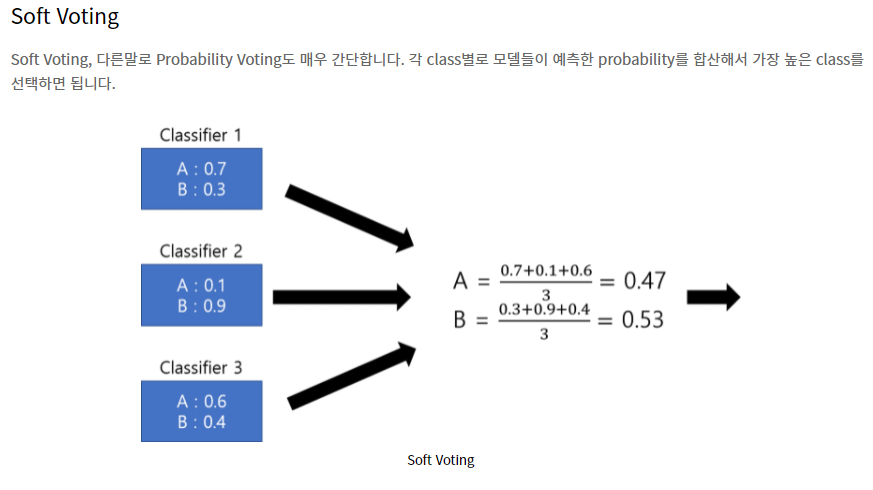

In [54]:
Image('C:/Users\queenSSH/Desktop/학교/CUAI/235647_심리 성향 예측 AI 경진대회_data/open data/softvoting.jpg')

In [55]:
model = soft_vote
pred_y = model.predict_proba(test)
pred_y = pred_y[:,1]

submission = pd.DataFrame({
    "index" : index,
    "voted" : pred_y
})
submission.to_csv('C:/Users\queenSSH/Desktop/학교/CUAI/235647_심리 성향 예측 AI 경진대회_data/open data/model1.csv', index=False)